In [1]:
import numpy as np
from pathlib import Path
from graspy.plot import pairplot, heatmap

import sys; sys.path.append('../')
from src.tools import get_files, get_latents
from src.plotting import visualize_embeddings, make_cbar
from src.tools import align, iterate_align

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def load_data(source_dir, data, exclude_ids=['073'], key='latent'):
    source_dir = Path(source_dir)
    if data == 'antoine':
        flag = "_emb"
        SOURCE = 'dmap2'
        ftype = 'npy'
    elif data == 'gcca':
        flag = "_gcca"
        SOURCE = 'gcca'
        ftype = 'h5'
    elif data == 'svd':
        flag = '_svd'
        SOURCE = 'gcca'
        ftype = 'h5'
    elif data == 'dmap':
        flag = '_dmap'
        SOURCE = 'gcca'
        ftype = 'h5'
    elif data == 'mase_dmap':
        flag = '_mase_dmap'
        SOURCE = 'gcca'
        ftype = 'h5'
    elif data == 'mase':
        flag = '_mase'
        SOURCE = 'gcca'
        ftype = 'h5'
    return get_latents(
        source_dir, flag=flag, ids=True, ftype=ftype, source=SOURCE, subjects_exclude=exclude_ids, as_groups=False,
        h5_key=key
    )

In [3]:
source_dir = '/mnt/ssd3/ronan/data/dmap_mapalign_aligned_12-02'
data = 'dmap'
source_dir = '/mnt/ssd3/ronan/data/template_align'
data = 'antoine'
Xs, labels, subjs = load_data(source_dir, data)
print(np.linalg.norm(Xs[0], axis=0))

sort_idx = np.argsort(subjs)
Xs = Xs[sort_idx]
labels = labels[sort_idx]
subjs = subjs[sort_idx]
labels_st = [l[0] + ' ' + l[1] for l in labels]
labels_subj_st = [f'{subj}, {l}' for subj,l in zip(subjs, labels_st)]

[432.09335 270.79    157.14806 141.35161 121.11877]


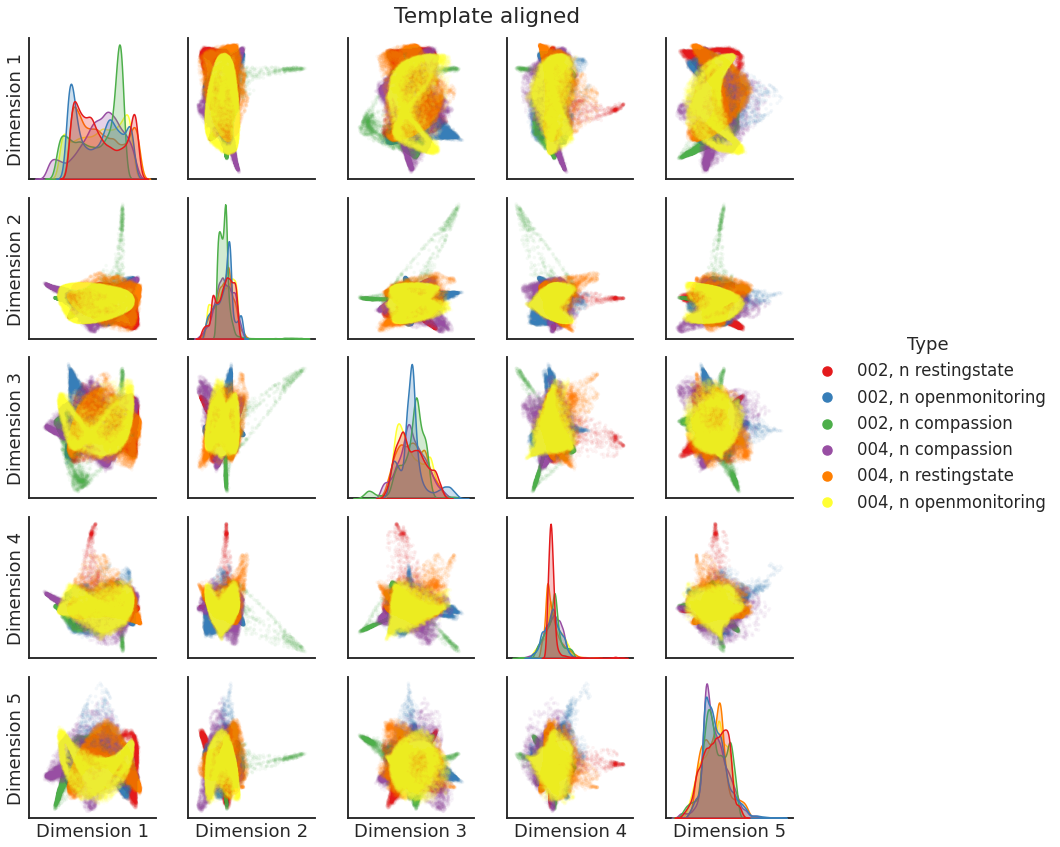

In [4]:
embeddings = Xs / np.linalg.norm(Xs, axis=1, keepdims=True)
pairplot(
    np.vstack(embeddings[:6]),
    labels=np.hstack([[l]*18715 for l in labels_subj_st[:6]]),
    alpha=0.05,
    title=f'Template aligned'
)

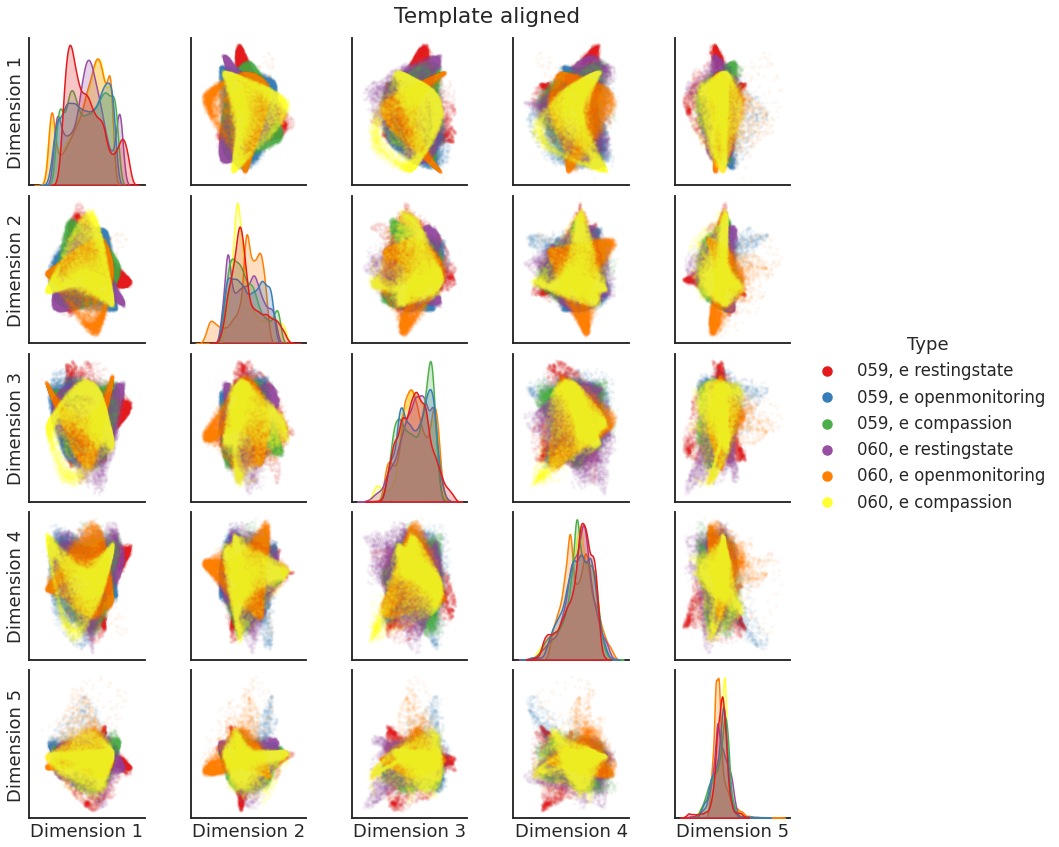

In [13]:
embeddings = Xs / np.linalg.norm(Xs, axis=1, keepdims=True)
pairplot(
    np.vstack(embeddings[99:105]),
    labels=np.hstack([[l]*18715 for l in labels_subj_st[99:105]]),
    alpha=0.05,
    title=f'Template aligned'
)